In [1]:
!pip install psycopg2

In [9]:
import flask # Python library for various functionalities
import psycopg2 # Python library for database connection
import pandas as pd
# connect to PostgreSQL
t_host = "GST-AZ-PSQL-D01" # this will be either "localhost", a domain name, or an IP address.
t_port = "5432" # default port for postgres server
t_dbname =  "ENTERPRISE_DW"
t_name_user = "tm1user"
t_password =  "Camry2018"


db_conn = psycopg2.connect(host=t_host, port=t_port, dbname=t_dbname, user=t_name_user, password=t_password)
db_cursor = db_conn.cursor()

def GetTableList(t_schema):
    # Retrieve the table list
    s = ""
    s += "SELECT"
    s += " table_schema"
    s += ", table_name"
    s += " FROM information_schema.tables"
    s += " WHERE"
    s += " ("
    s += " table_schema = '" + t_schema + "'"
    s += " )"
    s += " ORDER BY table_schema, table_name;"
  # Retrieve all the rows from the cursor
    db_cursor.execute(s)
    list_tables = db_cursor.fetchall()

    # Print the names of the tables
    for t_name_table in list_tables:
        print(t_name_table )


t_schema = "bi"
GetTableList(t_schema)

('bi', 'authz_delta')
('bi', 'bck20181207_ws_prt_monthly_workorders')
('bi', 'bck_fct_dtrng_dlr_stock')
('bi', 'bck_fct_mstr_veh')
('bi', 'bck_fct_mstr_veh_201901')
('bi', 'bck_fct_prt_dealer_invoice')
('bi', 'bck_ws_prt_bom_workorders')
('bi', 'bck_ws_prt_monthly_workorders')
('bi', 'bck_ws_prt_month_submit_workorders')
('bi', 'bkp_delta_fct_lio_acc_applcbl')
('bi', 'bkp_fct_dt_retail_revrsl')
('bi', 'bkp_fct_dtrng_dlr_stock')
('bi', 'bkp_fct_dt_trade')
('bi', 'bkp_fct_dt_wholesale_ignore')
('bi', 'bkp_fct_tms')
('bi', 'bkp_orig_fct_dt_retail_revrsl')
('bi', 'bkup_dimsn_dealer_04032019')
('bi', 'buy_sell_dlr_hrcy')
('bi', 'cryptdemo')
('bi', 'ctrl_trg_etl_load_rpt')
('bi', 'ctrl_trg_prt_hlth_rpt')
('bi', 'del_fct_prt_dealer_invoice')
('bi', 'dev_dimsn_district')
('bi', 'dimsn_acc_category')
('bi', 'dimsn_accy_cd')
('bi', 'dimsn_accy_typ')
('bi', 'dimsn_area')
('bi', 'dimsn_bay')
('bi', 'dimsn_bay_bck')
('bi', 'dimsn_bldg')
('bi', 'dimsn_bom')
('bi', 'dimsn_cal_eom')
('bi', 'dimsn_cens

In [10]:
db_conn.rollback()

In [22]:
"""def postque(query):
    db_cursor.execute(query)
    df=pd.DataFrame(db_cursor.fetchall())
    cols = list(map(lambda x: x[0], db_cursor.description))
    df.columns=cols
    print(df.head())
    return df

df2 = postque("SELECT veh_unit_id, retail_dt FROM bi.fct_dt_retail limit 100;")
df2.head()"""

'def postque(query):\n    db_cursor.execute(query)\n    df=pd.DataFrame(db_cursor.fetchall())\n    cols = list(map(lambda x: x[0], db_cursor.description))\n    df.columns=cols\n    print(df.head())\n    return df\n\ndf2 = postque("SELECT veh_unit_id, retail_dt FROM bi.fct_dt_retail limit 100;")\ndf2.head()'

In [ ]:
db_cursor.execute("""
with whsl_units as (
select distinct
r.region_abbr, trim(a.area_nm) as area_nm, di.district_cd, d.dealer_cd , concat(d.dealer_cd, '-', d.dealer_nm) as dlr_full_nm,
gp.series_group_nm, s.series_name, m.model_year, m.model_id,
c.fio_array,
c.lio_array , 
case when c.lio_array like '%LA%' then 'Y'
		when c.lio_array like '%TB%' then 'Y'
			when c.lio_array like '%TG%' then 'Y'
				when c.lio_array like '%TS%' then 'Y'
					when c.lio_array like '%TX%' then 'Y'
						when c.lio_array like '%TE%' then 'Y'
							when c.lio_array like '%TF%' then 'Y'
								when c.lio_array like '%TV%' then 'Y'
									when c.lio_array like '%OK%' then 'Y'
										when c.lio_array like '%TA%' then 'Y' 
									--when c.lio_array like '%TT%' then 'Y'
										else 'N'
	end as SPC_EDT_IND,
replace(replace(replace(replace(replace(replace(replace(replace(replace(replace(replace(replace(replace(replace(replace(replace(replace(replace(replace(replace(replace(replace(replace(c.lio_array, ' I2',''),'I2 ',''),'I2',''),' I1',''),' I1',''),'I1',''),' F1',''),'F1 ',''),'F1',''),' G1',''),'G1 ',''),'G1',''), ' *',''),'* ',''),'*',''),' **',''),'** ',''),'NS',''),'NS ',''),' NS',''),'VI',''),'VI ',''),' VI','') new_lio_array,
v.vin , v.veh_unit_id, v.wholesale_dt, wcal.month_id as whsl_monthid, v.retail_dt, rcal.month_id as rtl_monthid,
date_part('day',age(v.retail_dt , v.wholesale_dt))::integer  as dts, 
v.base_veh_dlr_cost::integer as base_veh_dlr_cost
from bi.fct_mstr_veh v , bi.dimsn_model m , bi.dimsn_series s , bi.dimsn_series_group gp , bi.dimsn_gst_veh_rtl_cal wcal , bi.dimsn_gst_veh_rtl_cal rcal , bi.fct_lio_acc_applcbl lio , bi.dimsn_dealer d,
bi.dimsn_district di , bi.dimsn_area a , bi.dimsn_region r , bi.mqt_veh_fio_lio_cfg c
where 1=1
and v.model_sn = m.dimsn_model_sn
and v.veh_unit_id = lio.veh_unit_id
and v.wholesale_dt = wcal.day_date 
and v.veh_unit_id = c.veh_unit_id
and v.original_dlr_sn = d.dimsn_dealer_sn and d.district_sn = di.dimsn_district_sn and di.area_sn = a.dimsn_area_sn and a.region_id = r.region_id
and v.retail_dt = rcal.day_date
and m.series_sn = s.dimsn_series_sn 
and s.series_group_sn = gp.dimsn_series_group_sn 
and v.sls_type_sn = 1 and coalesce(v.VM_ST_X_N,'N/A') not in ('D')
--and wcal.month_id >= 201701 and wcal.month_id <= 201712
--and wcal.month_id = 201801
and substring(wcal.month_id::text, 0, 5) >= '2019'
--and wcal.month_id = 202001
--and substring(wcal.month_id::text, 0, 5) = '2020'
and d.dealer_cd not in ('42103')
and gp.series_group_nm = 'TUNDRA'
					)--select * from whsl_units;
					,
lio_dollars as (
				select w.veh_unit_id, sum(lio.lio_dlr_cost)::integer as lio_dlr_cost
					from whsl_units w, bi.fct_lio_acc_applcbl lio 
					where w.veh_unit_id = lio.veh_unit_id and lio.is_sold = 1
					group by w.veh_unit_id
				)--select * from lio_dollars;
				,
spc_edt_appl as (
				select --v.wholesale_dt, v.vin, v.veh_unit_id , a.lio_acc_abrev, lio.is_sold, lio.is_applicable, a.lio_acc_desc
				distinct w.veh_unit_id, 
				'SE APPL' as model_group1
				from whsl_units w, bi.fct_lio_acc_applcbl lio, bi.dimsn_lio_acc a
				where w.veh_unit_id = lio.veh_unit_id and lio.lio_acc_sn = a.dimsn_lio_acc_sn 
				and (a.lio_acc_abrev in ('TB','TV','TS','TX','LA','OK','TA','TG','TE','TF') and lio.is_applicable = 1) and w.fio_array not like '%BZ%'
				and w.model_id not in ('8252','8254','8272','8274','8275','8276','8277','8278','8352','8354','8372','8374','8375','8376','8377','8378') 
				) --select * from spc_edt_appl;
				,
val_trk as (
				select --v.wholesale_dt, v.vin, v.veh_unit_id , a.lio_acc_abrev, lio.is_sold, lio.is_applicable, a.lio_acc_desc
				distinct w.veh_unit_id, 
				'VALUE TRUCK' as model_group2
				from whsl_units w, bi.fct_lio_acc_applcbl lio, bi.dimsn_lio_acc a
				where w.veh_unit_id = lio.veh_unit_id and lio.lio_acc_sn = a.dimsn_lio_acc_sn 
				and (a.lio_acc_abrev in ('TT','VP') and lio.is_applicable = 1) and w.fio_array not like '%BZ%' 
				and w.model_id not in ('8252','8254','8272','8274','8275','8276','8277','8278','8352','8354','8372','8374','8375','8376','8377','8378') 
				) --select * from val_trk;
				,
premium_trk as (
				select --v.wholesale_dt, v.vin, v.veh_unit_id , a.lio_acc_abrev, lio.is_sold, lio.is_applicable, a.lio_acc_desc
				distinct w.veh_unit_id, 
				'PREMIUM TRUCK' as model_group3
				from whsl_units w/*, bi.fct_lio_acc_applcbl lio, bi.dimsn_lio_acc a*/
				where /*w.veh_unit_id = lio.veh_unit_id and lio.lio_acc_sn = a.dimsn_lio_acc_sn and (a.lio_acc_abrev in ('TT','VP') and lio.is_applicable = 1)*/
					1=1 and w.model_id in ('8252','8254','8272','8274','8275','8276','8277','8278','8352','8354','8372','8374','8375','8376','8377','8378') and w.fio_array not like '%BZ%'
				) --select * from premium_trk;
				,
work_trk as (
				select --v.wholesale_dt, v.vin, v.veh_unit_id , a.lio_acc_abrev, lio.is_sold, lio.is_applicable, a.lio_acc_desc
				distinct w.veh_unit_id, 
				'WORK TRUCK' as model_group4
				from whsl_units w/*, bi.fct_lio_acc_applcbl lio, bi.dimsn_lio_acc a*/
				where /*w.veh_unit_id = lio.veh_unit_id and lio.lio_acc_sn = a.dimsn_lio_acc_sn and (a.lio_acc_abrev in ('TT','VP') and lio.is_applicable = 1)*/
					1=1 and w.fio_array like '%BZ%'
				) --select * from work_trk;
				,
trd_pro as (
				select --v.wholesale_dt, v.vin, v.veh_unit_id , a.lio_acc_abrev, lio.is_sold, lio.is_applicable, a.lio_acc_desc
				distinct w.veh_unit_id, 
				'TRD PRO' as model_group5
				from whsl_units w/*, bi.fct_lio_acc_applcbl lio, bi.dimsn_lio_acc a*/
				where /*w.veh_unit_id = lio.veh_unit_id and lio.lio_acc_sn = a.dimsn_lio_acc_sn and (a.lio_acc_abrev in ('TT','VP') and lio.is_applicable = 1)*/
					1=1 and w.model_id in ('8321','8351','8371','8373') and w.fio_array not like '%BZ%'
				) --select * from trd_pro;
				,
fio_dollars as (
				select w.veh_unit_id, sum(fio.fio_dlr_cost)::integer as fio_dlr_cost
					from whsl_units w, bi.fct_fio_acc_applcbl fio 
					where w.veh_unit_id = fio.veh_unit_id and fio.is_sold = 1
					group by w.veh_unit_id
				)--select * from fio_dollars;
				,
file as (
				select w.vin, w.veh_unit_id::text, w.region_abbr, w.area_nm, w.district_cd, w.dealer_cd, w.dlr_full_nm, w.series_group_nm, w.series_name, 
					w.model_year, w.model_id, w.fio_array, w.lio_array, w.new_lio_array, w.SPC_EDT_IND, s.model_group1, v.model_group2, p.model_group3, wt.model_group4, trd.model_group5, w.wholesale_dt, w.whsl_monthid, w.retail_dt, w.rtl_monthid, 
					w.dts::integer, w.base_veh_dlr_cost::integer, l.lio_dlr_cost::integer, f.fio_dlr_cost::integer, (w.base_veh_dlr_cost + l.lio_dlr_cost + f.fio_dlr_cost)::integer as ttl_dlr_cost
					from whsl_units w left outer join lio_dollars l on w.veh_unit_id = l.veh_unit_id
									  left outer join fio_dollars f on w.veh_unit_id = f.veh_unit_id
									  left outer join spc_edt_appl s on w.veh_unit_id = s.veh_unit_id
									  left outer join val_trk v on w.veh_unit_id = v.veh_unit_id
									  left outer join premium_trk p on w.veh_unit_id = p.veh_unit_id
									  left outer join work_trk wt on w.veh_unit_id = wt.veh_unit_id
									  left outer join trd_pro trd on w.veh_unit_id = trd.veh_unit_id
	    ) --select * from file;
	    ,
file1 as (
			select vin, veh_unit_id, region_abbr, area_nm, district_cd, dealer_cd, dlr_full_nm, series_group_nm, series_name, model_year, model_id,
			case
				when model_group1 = 'SE APPL' then 'SE Appl'
					when model_group2 = 'VALUE TRUCK' then 'Value Truck'
						when model_group3 = 'PREMIUM TRUCK' then 'Premium Truck'
							when model_group4 = 'WORK TRUCK' then 'Work Truck'
								when model_group5 = 'TRD PRO' then 'TRD PRO'
									else 'Other'
										end as model_group,
			fio_array, lio_array, new_lio_array, 
			replace(replace(replace(replace(replace(replace(replace(replace(replace(replace(replace(replace(replace(replace(replace(replace(replace(replace(replace(replace(new_lio_array, 'TB','SE'),'LA','SE'),'TX','SE'),'TG','SE'),'TS','SE'),'TE','SE'),'TF','SE'),'OK','SE'),'TV','SE'),'TA','SE'),'P2','PP'),'P3','PP'),'P4','PP'),'CK','CH'),'S6','SS'),'S7','SS'),'R1','TS'),'R2','TS'),'R4','TS'),'FN','FF') as new_lio_array,
			spc_edt_ind, wholesale_dt, whsl_monthid, retail_dt, rtl_monthid, dts, base_veh_dlr_cost, lio_dlr_cost, fio_dlr_cost, ttl_dlr_cost 
				from file 
				where 1=1 
				)select * from file1;""")

df=pd.DataFrame(db_cursor.fetchall())

In [6]:
cols = list(map(lambda x: x[0], db_cursor.description))
df.columns=cols

In [7]:
df.tail()

,vin,veh_unit_id,region_abbr,area_nm,district_cd,dealer_cd,dlr_full_nm,series_group_nm,series_name,model_year,...,spc_edt_ind,wholesale_dt,whsl_monthid,retail_dt,rtl_monthid,dts,base_veh_dlr_cost,lio_dlr_cost,fio_dlr_cost,ttl_dlr_cost
9662,5TFDW5F17KX853213,129329908,GST,Area 5,M,42348,42348-SHAPEN TOYOTA,TUNDRA,TUNDRA 4W,2019,...,N,2019-05-29,201905,2019-05-30,201905,1,36154,239,1264,37657
9663,5TFDY5F17KX845834,129075302,GST,Area 5,M,42348,42348-SHAPEN TOYOTA,TUNDRA,TUNDRA 4W,2019,...,N,2019-05-08,201905,2019-06-25,201906,17,44655,2358,0,47013
9664,5TFDY5F15KX814534,128199770,GST,Area 5,M,42348,42348-SHAPEN TOYOTA,TUNDRA,TUNDRA 4W,2019,...,N,2019-01-09,201901,2019-01-12,201901,3,44432,1684,0,46116
9665,5TFDY5F19KX829344,128636009,GST,Area 5,M,42348,42348-SHAPEN TOYOTA,TUNDRA,TUNDRA 4W,2019,...,N,2019-02-28,201902,2019-05-03,201905,3,44521,1388,0,45909
9666,5TFDY5F18KX846720,129075312,GST,Area 5,M,42348,42348-SHAPEN TOYOTA,TUNDRA,TUNDRA 4W,2019,...,N,2019-05-09,201905,2019-05-20,201905,11,44655,283,0,44938


### pull unit retail data by retail date

In [18]:

db_cursor.execute("""SELECT veh_unit_id, retail_dt, retail_month_id 
                      FROM bi.fct_dt_retail
                      ;
                  
                  """)
df=pd.DataFrame(db_cursor.fetchall())
cols = list(map(lambda x: x[0], db_cursor.description))
df.columns=cols

df.head()

,veh_unit_id,retail_dt,retail_month_id
0,111411591,2013-08-23 18:54:40,201308
1,112159838,2013-08-23 18:48:05,201308
2,112911539,2013-08-23 18:27:24,201308
3,112409204,2013-08-15 14:41:46,201308
4,112991159,2013-08-15 14:37:47,201308


In [19]:
df.shape

(2633676, 3)

In [55]:
import seaborn as sns


df2=df.groupby("retail_month_id").veh_unit_id.count()

In [56]:
df2=df2.reset_index()

In [58]:
df2=df2[(df2['retail_month_id']>201000)]

df2=df2[(df2['retail_month_id']<201906)]
df2

,retail_month_id,veh_unit_id
32,201001,11758
33,201002,14413
34,201003,22275
35,201004,17163
36,201005,18163
...,...,...
140,201901,24163
141,201902,24230
142,201903,28904
143,201904,25457


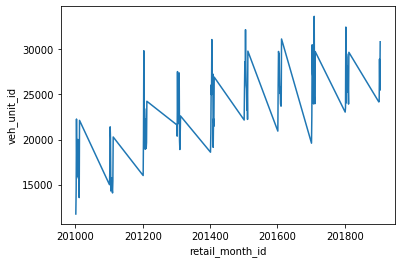

In [59]:
sns.lineplot(df2.retail_month_id,  df2.veh_unit_id)

In [60]:
df2.to_csv('sales.csv')